In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('insighters_output.csv', thousands=',')
consolidated_df = df.groupby('State').agg({'Active Loans': 'sum', 'Average Borrower Gross Income': 'mean', 'Very Low Income': 'sum', 'Low Income': 'sum',
                                           'Moderate Income': 'sum', 'Average Debt Ratio': 'mean', 'American Indian/\nAlaskan Native': 'sum',
                                           'Asian': 'sum', 'Black/\nAfrican-America': 'sum', 'Hawaiian/Pacific Islander': 'sum', 'White': 'sum', 'Hispanic': 'sum',
                                           'Married': 'sum', 'Average No of Depend': 'mean', 'Average Hshld Size': 'mean', 'First Time Home Buyer': 'sum',
                                           'Average Borrower Age': 'mean', 'Disability': 'sum',	'PUD': 'sum', 'Condo': 'sum', 'Coop': 'sum', 'Unknown  HSG Proj Type': 'sum',
                                           'Detached Structure': 'sum',	'Attached Structure': 'sum', 'Unknown Stucture': 'sum',	'Manufactured Homes': 'sum',
                                           'Average Living Area (Square Ft)': 'mean', 'Average Request Amount': 'mean', 'Average Loan Amount': 'mean', 'Average LTV': 'mean',
                                           'Average Appraised Value': 'mean'})

consolidated_df['State'] = consolidated_df.index

In [2]:
# creates the 'generosity' df
consolidated_df['Generosity'] = consolidated_df['Average Request Amount'] - consolidated_df['Average Loan Amount'] 

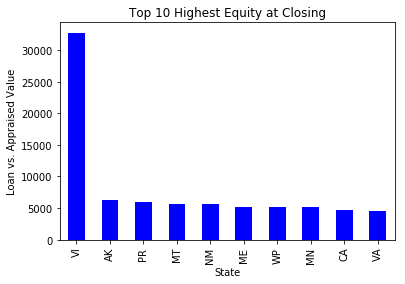

In [3]:
consolidated_df['Equity'] = consolidated_df['Average Appraised Value'] - consolidated_df['Average Loan Amount']
ax = consolidated_df.sort_values(by='Equity', ascending=False)[:10].plot. \
    bar(x='State', y='Equity', color='blue', legend=False, title="Top 10 Highest Equity at Closing")
ax.set_ylabel('Loan vs. Appraised Value');
plt.savefig('james1.png')

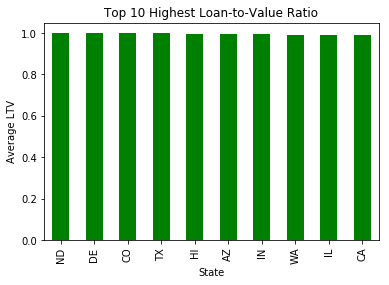

In [4]:
ax = consolidated_df.sort_values(by='Average LTV', ascending=False)[:10].plot. \
    bar(x='State', y='Average LTV', color='green', legend=False, title="Top 10 Highest Loan-to-Value Ratio")
ax.set_ylabel('Average LTV');
plt.savefig('james2.png')

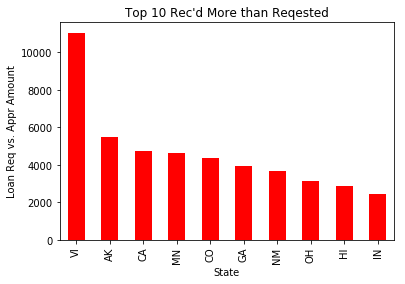

In [5]:
ax = consolidated_df.sort_values(by='Generosity', ascending=False)[:10].plot. \
    bar(x='State', y='Generosity', color='red', legend=False, title="Top 10 Rec'd More than Reqested")
ax.set_ylabel('Loan Req vs. Appr Amount');
plt.savefig('james3.png')